# Performing Analysis of Meteorological Data

Medium story - https://selvankumar6399.medium.com/performing-analysis-of-meteorological-data-f81ab730c5e7

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
weather_data = pd.read_csv('weatherHistory.csv')

In [3]:
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_data.rename({'Formatted Date':'Fdate', 'Temperature (C)':'temp', 'Apparent Temperature (C)':'apparent_temp',
                    'Humidity':'humidity','Wind Speed (km/h)':'wind_speed','Wind Bearing (degrees)':'wind_bearing',
                    'Visibility (km)':'visibility','Pressure (millibars)':'pressure'},axis=1, inplace=True)

In [5]:
weather_data.head()

,Fdate,Summary,Precip Type,temp,apparent_temp,humidity,wind_speed,wind_bearing,visibility,Loud Cover,pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
weather_data.shape

(96453, 12)

In [7]:
weather_data.dtypes

Fdate             object
Summary           object
Precip Type       object
temp             float64
apparent_temp    float64
humidity         float64
wind_speed       float64
wind_bearing     float64
visibility       float64
Loud Cover       float64
pressure         float64
Daily Summary     object
dtype: object

In [8]:
weather_data.describe()

,temp,apparent_temp,humidity,wind_speed,wind_bearing,visibility,Loud Cover,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Preprocessing

In [9]:
weather_data.isnull().sum()

Fdate              0
Summary            0
Precip Type      517
temp               0
apparent_temp      0
humidity           0
wind_speed         0
wind_bearing       0
visibility         0
Loud Cover         0
pressure           0
Daily Summary      0
dtype: int64

rain    85224
snow    10712
Name: Precip Type, dtype: int64


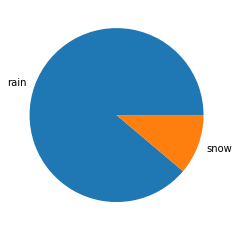

In [10]:
Precip_type = weather_data['Precip Type'].value_counts()
print(Precip_type)
plt.pie(Precip_type, labels=Precip_type.index);

In [11]:
weather_data['Precip Type'].value_counts().sum() 
#96453 - 95936 = 517 missing values

95936

### Removing unwanted columns

In [12]:
#Removing the Precip Type, Loud Cover column as it is not important for the analysis
weather_data.drop('Precip Type', axis =1,inplace=True)
weather_data.drop('Loud Cover',axis=1,inplace=True)
weather_data.drop('Summary', axis =1,inplace=True)
weather_data.drop('Daily Summary',axis=1,inplace=True)

In [13]:
weather_data.head()

,Fdate,temp,apparent_temp,humidity,wind_speed,wind_bearing,visibility,pressure
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [14]:
# Seperating DATE and YEAR for easy analytics 
weather_data['date'] = pd.to_datetime(weather_data['Fdate'])
weather_data['year'] = weather_data['date'].dt.year

In [15]:
weather_data.head()

,Fdate,temp,apparent_temp,humidity,wind_speed,wind_bearing,visibility,pressure,date,year
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006-03-31 22:00:00,2006
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006-03-31 23:00:00,2006
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006-04-01 00:00:00,2006
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006-04-01 01:00:00,2006
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006-04-01 02:00:00,2006


In [16]:
weather_data.shape

(96453, 10)

In [17]:
#checkong for null values
weather_data.isnull().sum()

Fdate            0
temp             0
apparent_temp    0
humidity         0
wind_speed       0
wind_bearing     0
visibility       0
pressure         0
date             0
year             0
dtype: int64

In [18]:
weather_data['Fdate'] = pd.to_datetime(weather_data['Fdate'],utc=True)

In [19]:
weather_data = weather_data.set_index('Fdate')

In [20]:
data = weather_data[['apparent_temp','humidity']].resample('MS').mean()

### January

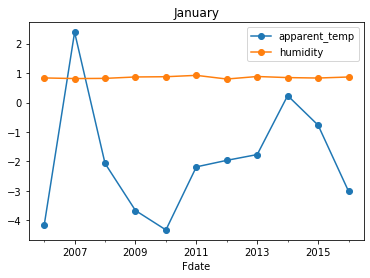

In [21]:
jan = data[data.index.month==1]
jan.plot(kind='line',marker='o')
plt.title('January');

### February`

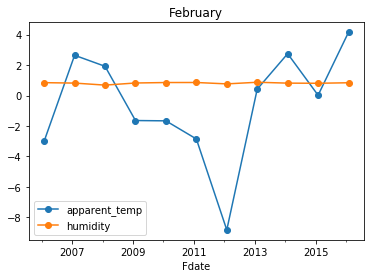

In [22]:
feb = data[data.index.month==2]
feb.plot(kind='line',marker='o')
plt.title('February');

### March

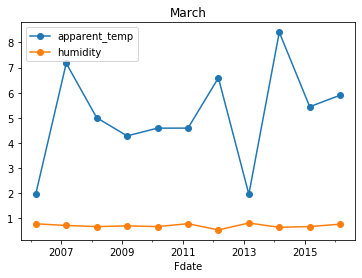

In [23]:
march = data[data.index.month==3]
march.plot(marker='o')
plt.title('March');

### April

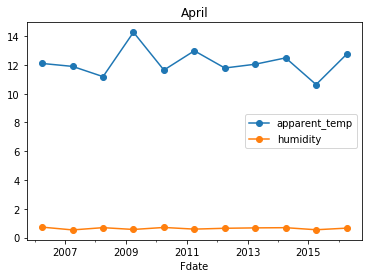

In [24]:
april = data[data.index.month==4]
april.plot(marker='o')
plt.title('April');

### May

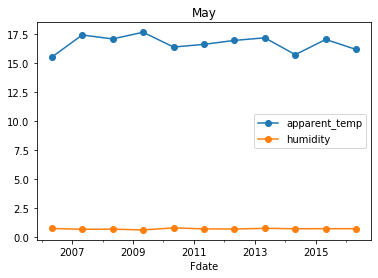

In [25]:
may = data[data.index.month==5]
may.plot(marker='o')
plt.title('May');

### June

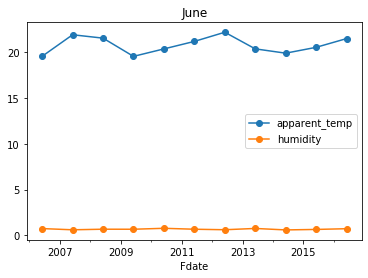

In [26]:
June = data[data.index.month==6]
June.plot(marker='o')
plt.title('June');

### July

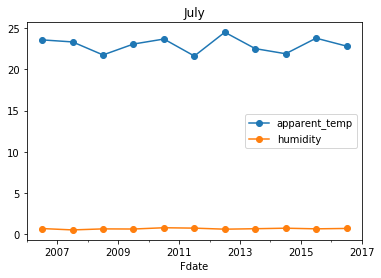

In [27]:
July = data[data.index.month==7]
July.plot(marker='o')
plt.title('July');

### August

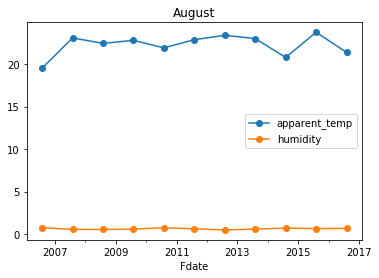

In [28]:
august= data[data.index.month==8]
august.plot(marker='o')
plt.title('August');

### September

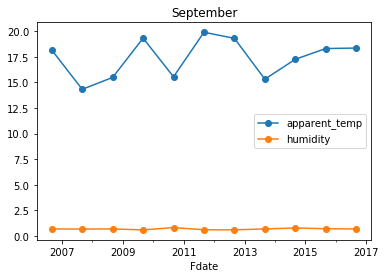

In [29]:
sept = data[data.index.month==9]
sept.plot(marker='o')
plt.title('September');

### October

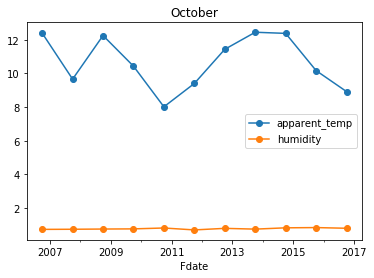

In [30]:
october = data[data.index.month==10]
october.plot(marker='o')
plt.title('October');

### November

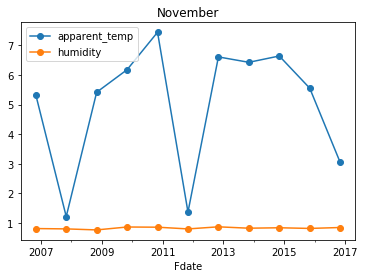

In [31]:
nov = data[data.index.month==11]
nov.plot(marker='o')
plt.title('November');

### December

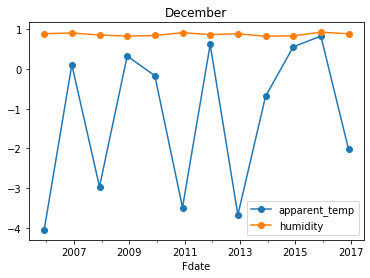

In [32]:
Dec = data[data.index.month==12]
Dec.plot(marker='o')
plt.title('December');